# Introduction 

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import f1_score

from sklearn.svm import SVC

import xgboost as XGB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
var_def = pd.read_csv('gdrive/My Drive/Colab Notebooks/Busura/Fraud_Detection/Variable_def.csv')
test_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Busura/Fraud_Detection/test.csv')
training_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Busura/Fraud_Detection/training.csv')


In [4]:
var_def

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [5]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [6]:
test_df.shape[0]

45019

In [7]:
training_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
training_df.shape[0]

95662

**NaN values**

Lets see if there is any NaN values in the training and test dataset. 

In [9]:
training_df.isna().sum() 

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [10]:
test_df.isna().sum() 

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

**Ratio between fraud and non-fraud**

We will now analyze the number of transaction that are fraud and the number of transaction that are non fraud. The target varaible is "FraudResult" and is found in the training dataset. 


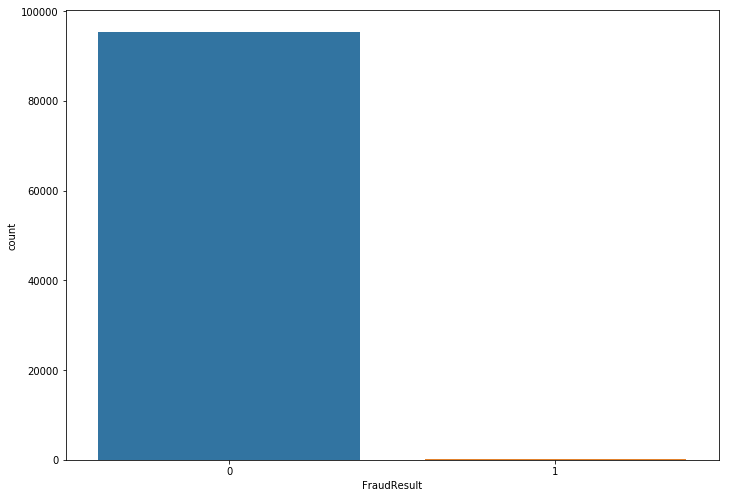

In [11]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='FraudResult',data=training_df);

In [12]:
training_df['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

As we can see the distribution of fraud vs non-fraud is skewed. With fraud being about 1/500 of the transactions. The conclusion is thus that it will be necessary to oversample or undersample the fraud subset of the data. 

**Correlation between features and fraudresult**

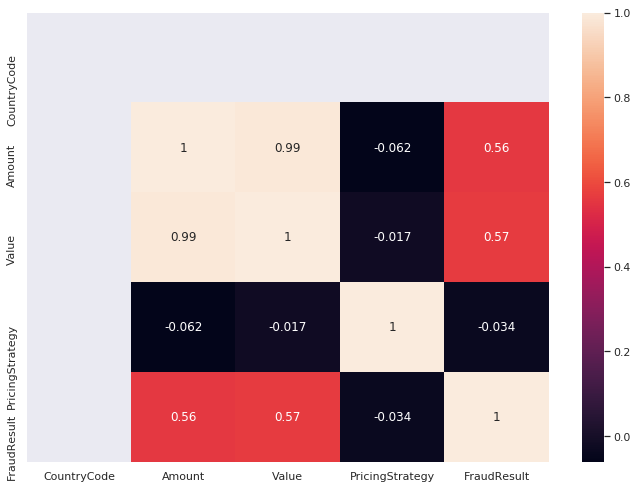

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(training_df.corr(),annot=True)

In [0]:
fraud = training_df.loc[training_df['FraudResult'] == 1]


In [15]:
fraud.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:04:51Z,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15T08:20:09Z,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:31:57Z,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T09:15:23Z,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T11:49:46Z,0,1


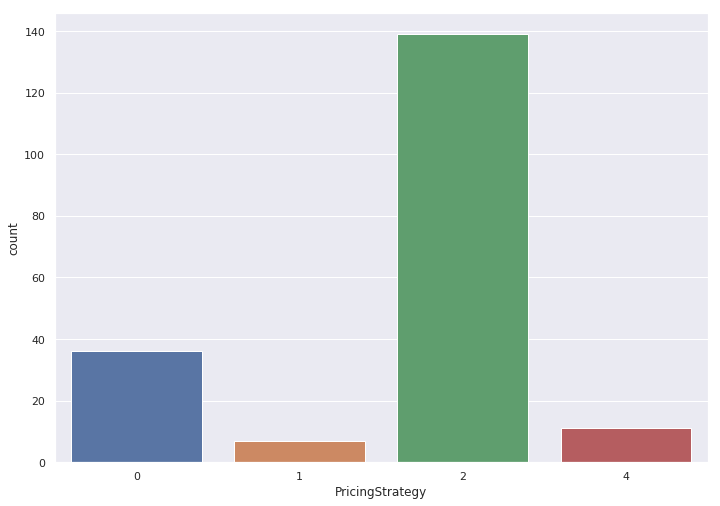

In [16]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='PricingStrategy',data=fraud);

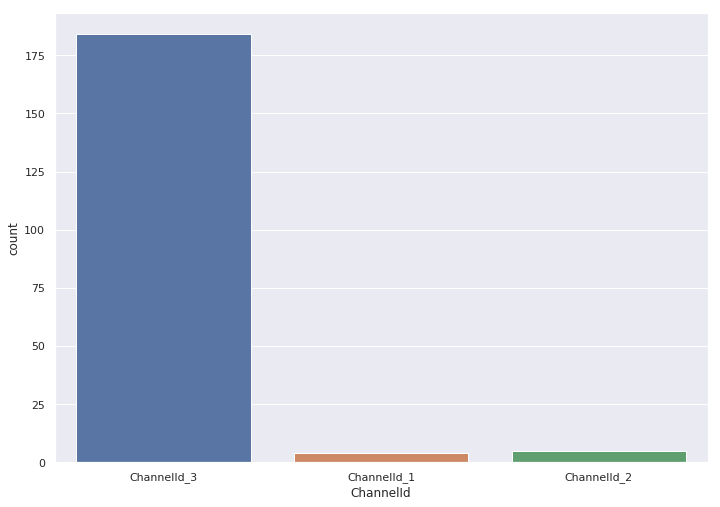

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='ChannelId',data=fraud);

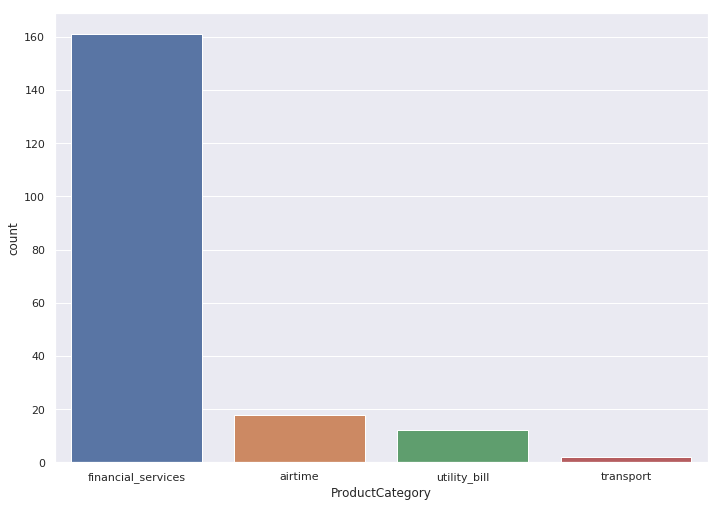

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='ProductCategory',data=fraud);

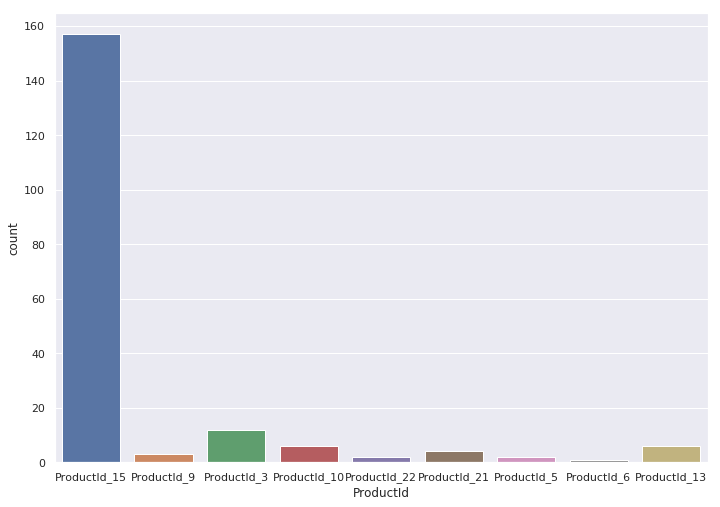

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='ProductId',data=fraud);

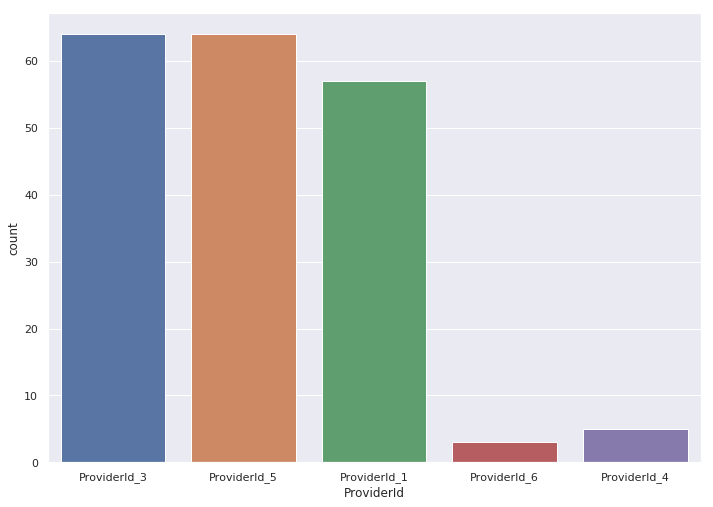

In [20]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='ProviderId',data=fraud);

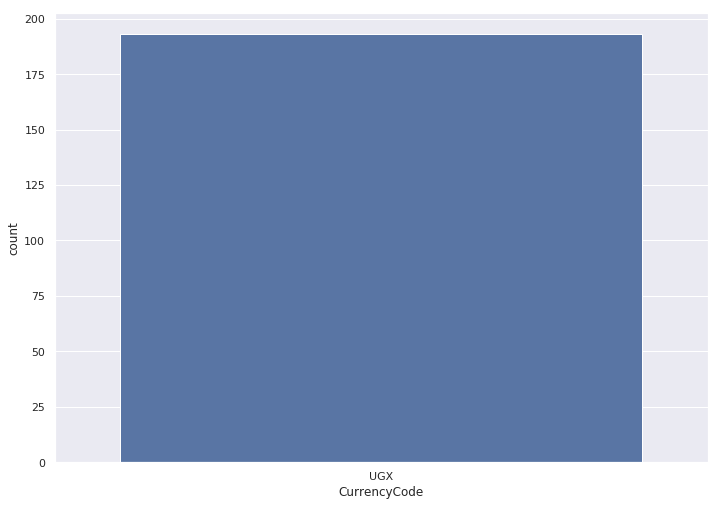

In [21]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='CurrencyCode',data=fraud);

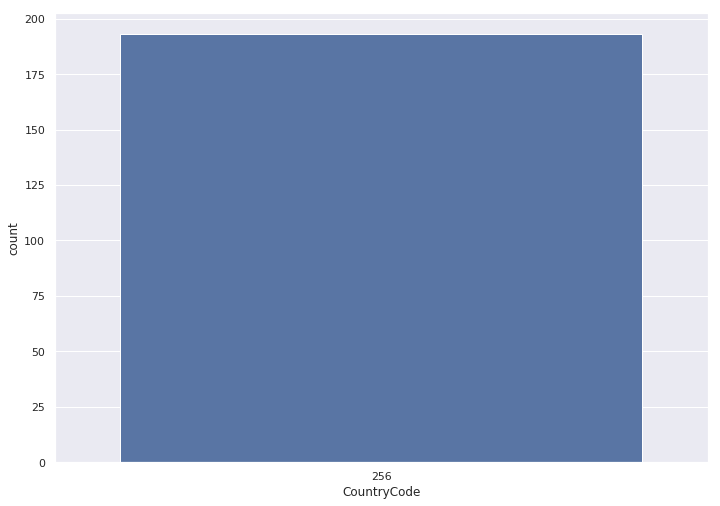

In [22]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='CountryCode',data=fraud);

As we can see in the countrycode and the currencycode all the values are equal, meaning that there is only one  (1) single value in all rows. Therefore, we want to look at the entire dataset to see if this holds true there as well. 

In [23]:
training_df['CountryCode'].value_counts()

256    95662
Name: CountryCode, dtype: int64

In [24]:
training_df['CurrencyCode'].value_counts()

UGX    95662
Name: CurrencyCode, dtype: int64

As we can see all the entries in the currencycode and the countrycode are with countrycode = 256, and Currencycode = UGX. This means that this features does not give us any information about how fraudulent a transaction is. 

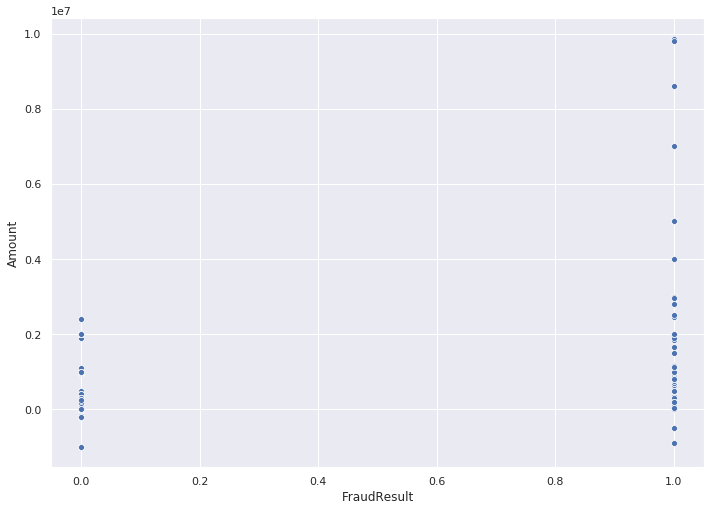

In [25]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(y="Amount", x="FraudResult", data=training_df)


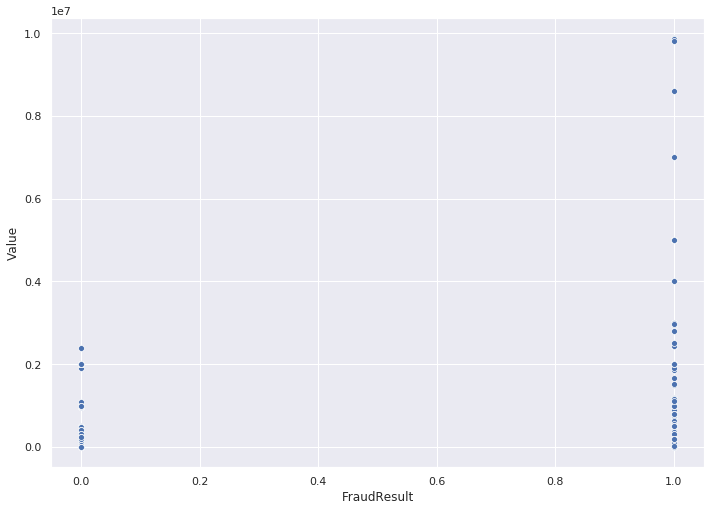

In [26]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(y="Value", x="FraudResult", data=training_df)


Les nalyze if we can see a pattern between the weekday of the transaction and the fraudresult. 

In [0]:
from datetime import datetime
L = []
for index in range(0,training_df.shape[0]):
  date = training_df['TransactionStartTime'][index][:10]
  year = int(date[:4])
  month = int(date[5:7])
  day = int(date[8:10])
  day_of_week = datetime(year, month, day).weekday()
  L.append(day_of_week)
weekday_df = pd.DataFrame(L, columns=['Weekday'])


In [28]:
weekday_df.apply(pd.value_counts)


,Weekday
4,27716
1,15049
0,11837
3,11039
2,10232
5,10103
6,9686


Now we will also extract the hour of the transaction.

In [0]:
from datetime import datetime
L = []
for index in range(0,training_df.shape[0]):
  hour_of_transaction = int(training_df['TransactionStartTime'][index][11:13])
  L.append(hour_of_transaction)
transaction_hour_df = pd.DataFrame(L, columns=['Hour_of_transaction'])


In [30]:
transaction_hour_df.apply(pd.value_counts)



,Hour_of_transaction
16,7306
17,7291
18,6332
15,6285
11,6226
10,5986
7,5723
8,5639
9,5443
6,5325


In [0]:
training_df = pd.concat([training_df, weekday_df], axis=1)

In [0]:
training_df = pd.concat([training_df, transaction_hour_df], axis=1)

In [33]:
training_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Weekday,Hour_of_transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,3,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,3,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,3,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,3,3


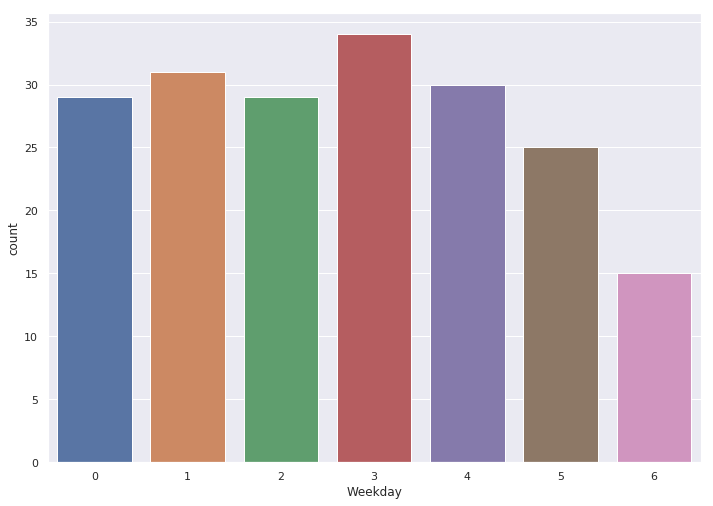

In [34]:
fraud = training_df.loc[training_df['FraudResult'] == 1]
sns.countplot(x='Weekday',data=fraud);


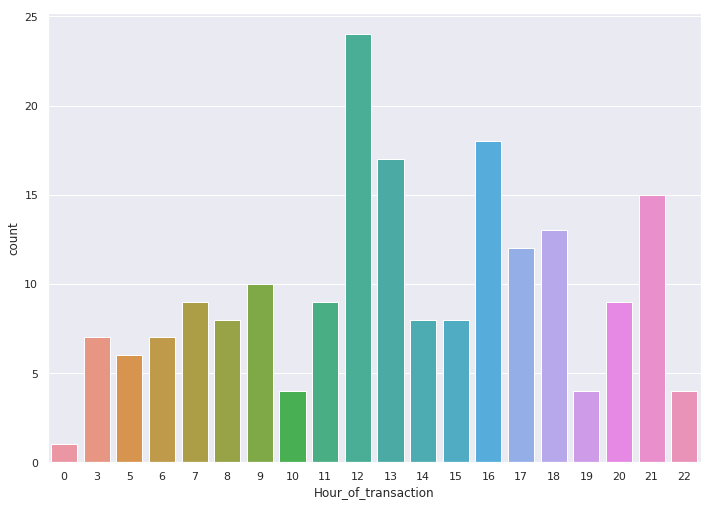

In [35]:
fraud = training_df.loc[training_df['FraudResult'] == 1]
sns.countplot(x='Hour_of_transaction',data=fraud);


In [36]:
fraud['Hour_of_transaction'].value_counts() / training_df['Hour_of_transaction'].value_counts()


0     0.005952
1          NaN
2          NaN
3     0.009804
4          NaN
5     0.001442
6     0.001315
7     0.001573
8     0.001419
9     0.001837
10    0.000668
11    0.001446
12    0.004561
13    0.003254
14    0.001545
15    0.001273
16    0.002464
17    0.001646
18    0.002053
19    0.000779
20    0.002974
21    0.010142
22    0.005857
23         NaN
Name: Hour_of_transaction, dtype: float64

In [37]:
fraud['Weekday'].value_counts() / training_df['Weekday'].value_counts()


0    0.002450
1    0.002060
2    0.002834
3    0.003080
4    0.001082
5    0.002475
6    0.001549
Name: Weekday, dtype: float64

In [38]:
training_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Weekday,Hour_of_transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,3,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,3,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,3,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,3,3


In [39]:
fraud['BatchId'].value_counts()

BatchId_126656    4
BatchId_32834     2
BatchId_40160     2
BatchId_125211    2
BatchId_7585      2
BatchId_56782     2
BatchId_66926     2
BatchId_68081     2
BatchId_93685     1
BatchId_62465     1
BatchId_131348    1
BatchId_94007     1
BatchId_34263     1
BatchId_113961    1
BatchId_48573     1
BatchId_125935    1
BatchId_134366    1
BatchId_87400     1
BatchId_5957      1
BatchId_95619     1
BatchId_55743     1
BatchId_9913      1
BatchId_132349    1
BatchId_10711     1
BatchId_33505     1
BatchId_101131    1
BatchId_129124    1
BatchId_133354    1
BatchId_43757     1
BatchId_75522     1
                 ..
BatchId_29896     1
BatchId_135975    1
BatchId_116744    1
BatchId_27577     1
BatchId_135779    1
BatchId_11016     1
BatchId_134443    1
BatchId_111976    1
BatchId_125276    1
BatchId_120561    1
BatchId_36023     1
BatchId_118851    1
BatchId_1480      1
BatchId_32463     1
BatchId_56005     1
BatchId_61860     1
BatchId_40333     1
BatchId_134068    1
BatchId_9930      1


In [40]:
fraud['AccountId'].value_counts()

AccountId_572     31
AccountId_4421    22
AccountId_1609    14
AccountId_4003    12
AccountId_1909     8
AccountId_2656     7
AccountId_4590     7
AccountId_1873     7
AccountId_4687     7
AccountId_3337     6
AccountId_1178     6
AccountId_1959     5
AccountId_523      4
AccountId_4249     4
AccountId_3832     3
AccountId_2366     3
AccountId_953      3
AccountId_1825     2
AccountId_4004     2
AccountId_1488     2
AccountId_4465     2
AccountId_830      2
AccountId_1208     2
AccountId_530      2
AccountId_2043     2
AccountId_3943     2
AccountId_476      1
AccountId_1898     1
AccountId_2289     1
AccountId_777      1
AccountId_1520     1
AccountId_4637     1
AccountId_3692     1
AccountId_368      1
AccountId_3519     1
AccountId_4841     1
AccountId_352      1
AccountId_1240     1
AccountId_3041     1
AccountId_2123     1
AccountId_1823     1
AccountId_1335     1
AccountId_2244     1
AccountId_1291     1
AccountId_1317     1
AccountId_1754     1
AccountId_4655     1
AccountId_246

In [41]:

fraud['SubscriptionId'].value_counts()

SubscriptionId_2950    31
SubscriptionId_4038    22
SubscriptionId_2872    14
SubscriptionId_3002    12
SubscriptionId_2496     8
SubscriptionId_2912     7
SubscriptionId_2964     7
SubscriptionId_4160     7
SubscriptionId_666      7
SubscriptionId_1252     6
SubscriptionId_2288     6
SubscriptionId_1476     5
SubscriptionId_4429     4
SubscriptionId_2315     4
SubscriptionId_162      3
SubscriptionId_4834     3
SubscriptionId_4161     3
SubscriptionId_814      2
SubscriptionId_842      2
SubscriptionId_380      2
SubscriptionId_1100     2
SubscriptionId_1417     2
SubscriptionId_1262     2
SubscriptionId_1355     2
SubscriptionId_4080     2
SubscriptionId_135      2
SubscriptionId_3125     1
SubscriptionId_3303     1
SubscriptionId_3829     1
SubscriptionId_1456     1
SubscriptionId_4427     1
SubscriptionId_2940     1
SubscriptionId_526      1
SubscriptionId_2416     1
SubscriptionId_2272     1
SubscriptionId_3706     1
SubscriptionId_3060     1
SubscriptionId_539      1
Subscription

In [42]:
fraud['CustomerId'].value_counts()

CustomerId_909     31
CustomerId_4878    22
CustomerId_1988    14
CustomerId_4453    12
CustomerId_2303     8
CustomerId_5054     7
CustomerId_2266     7
CustomerId_5155     7
CustomerId_3075     7
CustomerId_1535     6
CustomerId_3768     6
CustomerId_2353     5
CustomerId_856      4
CustomerId_1302     3
CustomerId_4275     3
CustomerId_865      3
CustomerId_2445     2
CustomerId_1858     2
CustomerId_2216     2
CustomerId_1567     2
CustomerId_7339     2
CustomerId_4391     2
CustomerId_4454     2
CustomerId_4925     2
CustomerId_1175     2
CustomerId_7414     2
CustomerId_1653     1
CustomerId_3467     1
CustomerId_7416     1
CustomerId_1984     1
CustomerId_806      1
CustomerId_1602     1
CustomerId_3956     1
CustomerId_2656     1
CustomerId_7401     1
CustomerId_1850     1
CustomerId_2292     1
CustomerId_4075     1
CustomerId_7429     1
CustomerId_698      1
CustomerId_4134     1
CustomerId_5105     1
CustomerId_1680     1
CustomerId_1698     1
CustomerId_4128     1
CustomerId

## Conclusion data exploration

- Drop CurrencyCode
- Drop CountryCode
- Change TransactionStartTime to weekday and transaction hour 
- Change ProviderId	to numerical catergory  
- Change ProductId	to numerical catergory  
- Change ProductCategory	to numerical catergory  
- Change ChannelId to numerical catergory  
- Value and Amount contains similair information.
- TransactionID does not contain any information about if the transation is fraudulent, it is simply an identifier. 
- Resampling is necessary as the number of fraud transaction are 1/500 of the total transactions.
- Could be beneficial to split the data in two sets. One for previous customers and one for new customer, each would have their own ML algorithm. 

- Add feature dealing with the customers previous transaction. Such as number of previous fradulent transactions, number of previous transactions, 

- If a transactions value is larger than 0.4*10^7 then we flag it

## Feature engineering

In [0]:
test_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Busura/Fraud_Detection/test.csv')
training_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Busura/Fraud_Detection/training.csv')


In [0]:
y_train = training_df[['TransactionId','FraudResult']]


In [45]:
y_train

,TransactionId,FraudResult
0,TransactionId_76871,0
1,TransactionId_73770,0
2,TransactionId_26203,0
3,TransactionId_380,0
4,TransactionId_28195,0
5,TransactionId_23223,0
6,TransactionId_118063,0
7,TransactionId_100640,0
8,TransactionId_51905,0
9,TransactionId_130161,0


In [0]:
training_df.drop(columns=['FraudResult'],inplace=True)

In [0]:
df = pd.concat([training_df,test_df], ignore_index = True)


In [0]:
df.drop(columns=['CurrencyCode','CountryCode'],inplace=True)

In [0]:
from datetime import datetime
L = []
for index in range(0,df.shape[0]):
  date = df['TransactionStartTime'][index][:10]
  year = int(date[:4])
  month = int(date[5:7])
  day = int(date[8:10])
  day_of_week = datetime(year, month, day).weekday()
  L.append(day_of_week)
weekday_df = pd.DataFrame(L, columns=['Weekday'])


In [0]:
df = pd.concat([df, weekday_df], axis=1)

In [0]:
from datetime import datetime
L = []
for index in range(0,df.shape[0]):
  hour_of_transaction = int(df['TransactionStartTime'][index][11:13])
  L.append(hour_of_transaction)
transaction_hour_df = pd.DataFrame(L, columns=['Hour_of_transaction'])

In [0]:
df = pd.concat([df, transaction_hour_df], axis=1)

In [0]:
df.drop(columns=['TransactionStartTime'],inplace=True)

In [0]:
df["ProviderId"] = pd.Categorical(df["ProviderId"])
df["ProviderId"] = df["ProviderId"].cat.codes

df["ProductId"] = pd.Categorical(df["ProductId"])
df["ProductId"] = df["ProductId"].cat.codes

df["ProductCategory"] = pd.Categorical(df["ProductCategory"])
df["ProductCategory"] = df["ProductCategory"].cat.codes

df["ChannelId"] = pd.Categorical(df["ChannelId"])
df["ChannelId"] = df["ChannelId"].cat.codes


**Extract the training data**

We do this to be able to apply oversampling of the minority class in a easy way.

In [0]:
train_df = df.loc[df['TransactionId'].isin(training_df['TransactionId'])]

In [0]:
test_df = df.loc[~df['TransactionId'].isin(training_df['TransactionId'])]

In [57]:
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,Weekday,Hour_of_transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,1,0,2,1000.0,1000,2,3,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,23,2,1,-20.0,20,2,3,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,0,0,2,500.0,500,2,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,13,9,2,20000.0,21800,2,3,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,23,2,1,-644.0,644,2,3,3


In [0]:
X_train = train_df[['ProviderId','ProductCategory','ChannelId','Amount','PricingStrategy','Weekday','Hour_of_transaction']]

## Dealing with imbalanced data

- We will apply three different SMOTE functions.

In [0]:
dict_smote = {}
def apply_smote(X_train,y_train):
  for sampling_ratio in range(1,11):
    sm = SMOTE(random_state=2, sampling_strategy=sampling_ratio/10)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    X_train_smote = pd.DataFrame(X_train_smote)
    X_train_smote.columns = X_train.columns

    y_train_smote = pd.DataFrame(y_train_smote)
    y_train_smote.columns = y_train.columns

    dict_smote[str(sampling_ratio)] = [X_train_smote,y_train_smote]
  return dict_smote


In [0]:
from imblearn.combine import SMOTEENN

dict_smoteenn = {}
def apply_smoteenn(X_train,y_train):
  for sampling_ratio in range(1,11):
    sm_enn = SMOTEENN(random_state=2, sampling_strategy=sampling_ratio/10)
    X_train_smoteenn, y_train_smoteenn = sm_enn.fit_resample(X_train, y_train)

    X_train_smoteenn = pd.DataFrame(X_train_smoteenn)
    X_train_smoteenn.columns = X_train.columns

    y_train_smoteenn = pd.DataFrame(y_train_smoteenn)
    y_train_smoteenn.columns = y_train.columns

    dict_smoteenn[str(sampling_ratio)] = [X_train_smoteenn, y_train_smoteenn]
  return dict_smoteenn


In [0]:
from imblearn.combine import SMOTETomek
dict_smote_tomek = {}

def apply_smote_tomek(X_train,y_train):
  for sampling_ratio in range(1,11):
    sm_tomek = SMOTETomek(random_state=2, sampling_strategy=sampling_ratio/10)
    X_train_smote_tomek, y_train_smote_tomek = sm_tomek.fit_resample(X_train, y_train)

    X_train_smote_tomek = pd.DataFrame(X_train_smote_tomek)
    X_train_smote_tomek.columns = X_train.columns

    y_train_smote_tomek = pd.DataFrame(y_train_smote_tomek)
    y_train_smote_tomek.columns = y_train.columns

    dict_smote_tomek[str(sampling_ratio)] = [X_train_smote_tomek, y_train_smote_tomek]
  return dict_smote_tomek



In [116]:
X_test_.iloc[[0]]

,ProviderId,ProductCategory,ChannelId,Amount,PricingStrategy,Weekday,Hour_of_transaction
69075,0,0,2,2000.0,4,2,11


In [0]:
def ML_homemade(X_train, X_test, y_train, y_test):
  model = RandomForestClassifier(random_state=3, n_estimators=20)
  model.fit(X_train, y_train)
  L = []
  for index in range(0,X_test.shape[0]):
    if int(X_test['Amount'].iloc[index]) > 40000000:
      L.append(1)
    else: 
      pred = model.predict(X_test.iloc[[index]])
      L.append(pred)
      
  return f1_score(y_test, L)

In [0]:
def ML_models(X_train, X_test, y_train, y_test):
  model = RandomForestClassifier(random_state=3, n_estimators=20)
  model.fit(X_train, y_train)
  rf_pred = model.predict(X_test)
  print(f1_score(y_test, rf_pred)  )
  
  model = GradientBoostingClassifier(n_estimators=90, max_depth=3, random_state=8) 
  model.fit(X_train,y_train)
  gb_pred = model.predict(X_test)
  print(f1_score(y_test, gb_pred))
  
  #print(ML_homemade(X_train, X_test, y_train, y_test)) 
  
  
  
  

In [0]:
def split_dataset(features, target):  
  X_train, X_test, y_train, y_test = train_test_split( features, target, test_size=0.4, random_state=0)
  return X_train, X_test, y_train, y_test

In [0]:
X_train_, X_test_, y_train_, y_test_ = split_dataset(X_train, y_train[['FraudResult']])
dict_smote = apply_smote(X_train_,y_train_)
dict_smoteenn = apply_smoteenn(X_train_,y_train_)
dict_smote_tomek = apply_smote_tomek(X_train_,y_train_)

In [0]:
for key,value in dict_smote.items():
  X_train_,y_train_ = dict_smote[key]
  print(key)
  ML_models(X_train_, X_test_, y_train_, y_test_)

In [0]:
for key,value in dict_smote.items():
  X_train_,y_train_ = dict_smoteenn[key]
  print(key)
  ML_models(X_train_, X_test_, y_train_, y_test_)

In [0]:
for key,value in dict_smote.items():
  X_train_,y_train_ = dict_smote_tomek[key]
  print(key)
  ML_models(X_train_, X_test_, y_train_, y_test_)

# Submission

In [132]:
X_train.head()

,ProviderId,ProductCategory,ChannelId,Amount,PricingStrategy,Weekday,Hour_of_transaction
0,5,0,2,1000.0,2,3,2
1,3,2,1,-20.0,2,3,2
2,5,0,2,500.0,2,3,2
3,0,9,2,20000.0,2,3,3
4,3,2,1,-644.0,2,3,3


In [0]:
sm = SMOTE(random_state=2, sampling_strategy=1/10)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train['FraudResult'])

model = RandomForestClassifier(random_state=3, n_estimators=20)
model.fit(X_train_smote, y_train_smote)

X_test = test_df[['ProviderId','ProductCategory','ChannelId','Amount','PricingStrategy','Weekday','Hour_of_transaction']]

L = []
for index in range(0,X_test.shape[0]):
  if int(X_test['Amount'].iloc[index]) > 30000000:
    L.append(1)
  else: 
    pred = model.predict(X_test.iloc[[index]])
    L.append(int(pred))

In [0]:

submission = pd.DataFrame({'TransactionId':test_df['TransactionId'],'FraudResult':L})
from google.colab import files
submission.to_csv('final_busura_model.csv',index=False) 
files.download('final_busura_model.csv')